# Metaverse Transactions

# Business objective: Detect fraudulent transactions in the metaverse

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Lets read in the dataset as a dataframe

In [2]:
df = pd.read_csv("metaverse_transactions_dataset.csv")

In [3]:
df.head()

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


The anomaly column will be the classification label that the machine learning model will predict based on the features.

In [4]:
df['anomaly'].value_counts()


anomaly
low_risk         63494
moderate_risk     8611
high_risk         6495
Name: count, dtype: int64

The value counts of the anomaly column shows us that the dataset is imbalanced because there are far more cases of low risk transactions compared to moderate and high risk transactions.

In [5]:
df.shape

(78600, 14)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hour_of_day,78600.0,11.532634,6.935897,0.00,6.000000,12.0000,18.000000,23.000000
amount,78600.0,502.574903,245.898146,0.01,331.319966,500.0295,669.528311,1557.150905
ip_prefix,78600.0,147.644430,69.388143,10.00,172.000000,172.1600,192.000000,192.168000
login_frequency,78600.0,4.178702,2.366038,1.00,2.000000,4.0000,6.000000,8.000000
session_duration,78600.0,69.684606,40.524476,20.00,35.000000,60.0000,100.000000,159.000000
risk_score,78600.0,44.956722,21.775365,15.00,26.250000,40.0000,52.500000,100.000000


The describe method gives us a quick overview of the main statistics of the numeric columns. Just looking at the min, max and quartile values, there doesn't seem to be any outliers in these columns. However, we will confirm this later on when we take a closer look.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          78600 non-null  object 
 1   hour_of_day        78600 non-null  int64  
 2   sending_address    78600 non-null  object 
 3   receiving_address  78600 non-null  object 
 4   amount             78600 non-null  float64
 5   transaction_type   78600 non-null  object 
 6   location_region    78600 non-null  object 
 7   ip_prefix          78600 non-null  float64
 8   login_frequency    78600 non-null  int64  
 9   session_duration   78600 non-null  int64  
 10  purchase_pattern   78600 non-null  object 
 11  age_group          78600 non-null  object 
 12  risk_score         78600 non-null  float64
 13  anomaly            78600 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.4+ MB


The info method shows that there are no null values in this dataset that we have to deal with and we can also confirm this through the isna() and sum() methods.

Running through all the columns and their Dtypes confirms that all columns are assigned the correct Dtype, so no need to make any changes there.

In [8]:
df.isna().sum()

timestamp            0
hour_of_day          0
sending_address      0
receiving_address    0
amount               0
transaction_type     0
location_region      0
ip_prefix            0
login_frequency      0
session_duration     0
purchase_pattern     0
age_group            0
risk_score           0
anomaly              0
dtype: int64

Summing all the null values for each column confirms there are no null values to deal with in this dataset.

# EDA On Categorical Columns

In [9]:
df.select_dtypes(include='object')

# This allows us to see all the categorical columns in the dataset.

,timestamp,sending_address,receiving_address,transaction_type,location_region,purchase_pattern,age_group,anomaly
0,2022-04-11 12:47:27,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,transfer,Europe,focused,established,low_risk
1,2022-06-14 19:12:46,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,purchase,South America,focused,established,low_risk
2,2022-01-18 16:26:59,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,purchase,Asia,focused,established,low_risk
3,2022-06-15 09:20:04,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,transfer,South America,high_value,veteran,low_risk
4,2022-02-18 14:35:30,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,sale,Africa,high_value,veteran,moderate_risk
...,...,...,...,...,...,...,...,...
78595,2022-02-13 12:52:27,0xa99b9a7f5c5dd37429771efd3b93c6fbe1ab2936,0x5a78c88c5fc1e9b512f6c64e266b46a9db0a7238,transfer,Africa,random,new,low_risk
78596,2022-02-16 16:15:29,0xcca095ad2d508c200bda1141f783d77c3e6cbb08,0xb71a4df291ea8e9996a74e77ab63f5abcbfe90f5,purchase,Africa,focused,established,low_risk
78597,2022-08-04 16:06:42,0xe0b340171486b08f0c1f4ac607ed776478cefd2b,0x577754308538f4be10a41afb4f8900cd24d7098f,purchase,Africa,random,new,low_risk
78598,2022-02-26 04:06:08,0xb0b2f6fc707fbb7f9d27a9f4fe0cb0d6b39a0155,0xd6ba299fdd52f09f01d9648036ca446498c01ac2,purchase,Asia,focused,established,low_risk


In [10]:
df['timestamp'].value_counts()

# Timestamp has high cardinality due to 78513 uniques values which indicates this column will not be very useful for our ML
# model.

timestamp
2022-09-27 02:09:36    2
2022-11-28 02:31:24    2
2022-02-13 18:13:20    2
2022-11-16 20:06:02    2
2022-06-09 17:10:49    2
                      ..
2022-09-28 13:34:13    1
2022-03-31 04:53:34    1
2022-03-26 15:22:17    1
2022-09-01 16:34:33    1
2022-06-25 14:27:37    1
Name: count, Length: 78513, dtype: int64

In [11]:
df['sending_address'].value_counts()

sending_address
0x4bfe6fa35149db081520aea5e503946572718756    232
0xb0b2f6fc707fbb7f9d27a9f4fe0cb0d6b39a0155    204
0x91ee0c3b3f87d070e260f6208c52534d36817dae    203
0xccbf5a9926606c77db8391185066a8ee3bc0a2af    203
0xf24dd92ee52bb0de1bab87766a4a3f1c17b2c4d9    203
                                             ... 
0xeb57df95b6822a78c2be987e14df39eb23221134     29
0xa08d2ae262a2181cfaef98f76adbb10396504fcf     29
0xe79cfaf34f8d8c3e20a2a202ee64e2542b74f78f     29
0xb52a1c71ffa5252b865e3e7e885f0d74b4984d60     29
0x95a91a4a20a4522edc7bd90efe20287e365b3637     29
Name: count, Length: 1161, dtype: int64

In [12]:
df['receiving_address'].value_counts()

receiving_address
0x86b61ffe9ce4da504e6b7cf3f0925c1941265074    232
0x617b83371b4c65debb6c2e90de89c827ddcb0884    203
0x897c07cac7f9149d0be00903c55d810f6e42c9cc    203
0xbc9bc0162fe1ef6624c4f9ea0139576e7407a99d    203
0x0496b829a3ede37a92aa2b9b101549ed23018cb8    203
                                             ... 
0x51a53117845631a7d7f3be1380c2ad8b1bf0b804     29
0xe0985c197011d1a8a9c495c5bd64442d16db5f36     29
0x3108e1d0956526998fc5cc8a008ea4fed631162b     29
0xf24dd92ee52bb0de1bab87766a4a3f1c17b2c4d9     29
0x6581e36d96fae9eec6e9b94802ffab6e3f017462     29
Name: count, Length: 1166, dtype: int64

<Axes: xlabel='transaction_type', ylabel='count'>

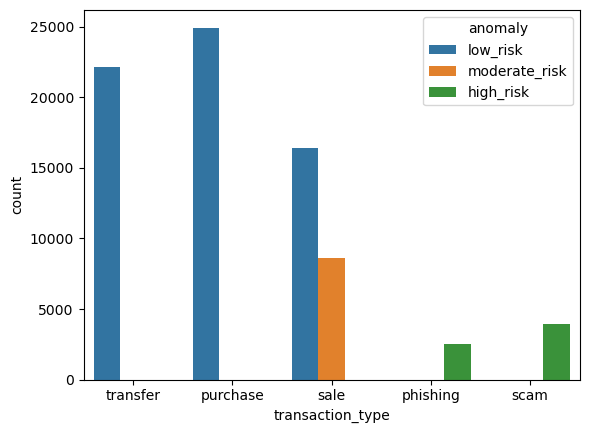

In [13]:
sns.countplot(data=df,x='transaction_type',hue='anomaly')

# All transfer and purchase transaction types are low_risk. 

# Sale transaction type is the only one with some cases of moderate risk

# All cases of scam and phishing have a high risk which makes sense.

<Axes: xlabel='location_region', ylabel='count'>

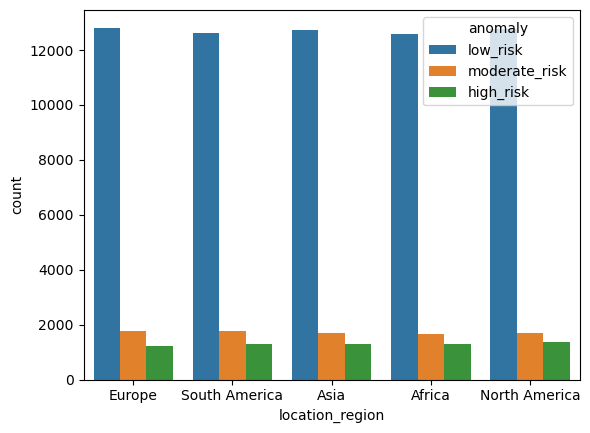

In [14]:
sns.countplot(data=df,x='location_region',hue='anomaly')

This shows that the number of anomaly types are almost equal across the continents and there isn't a specific region that is more prone to low, moderate or higher risk transactions.

<Axes: xlabel='purchase_pattern', ylabel='count'>

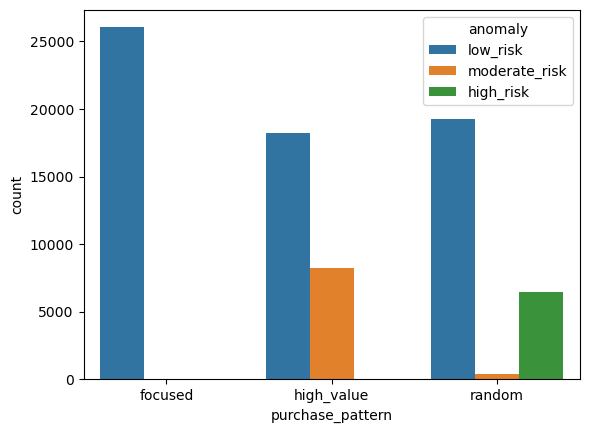

In [15]:
sns.countplot(data=df,x='purchase_pattern',hue='anomaly')

Random purchase pattern suggests that users that are making purchases that are not well thought out or maybe from untrusted sellers, due to a lack of experience, and as a result, tend to be more risky.

<Axes: xlabel='age_group', ylabel='count'>

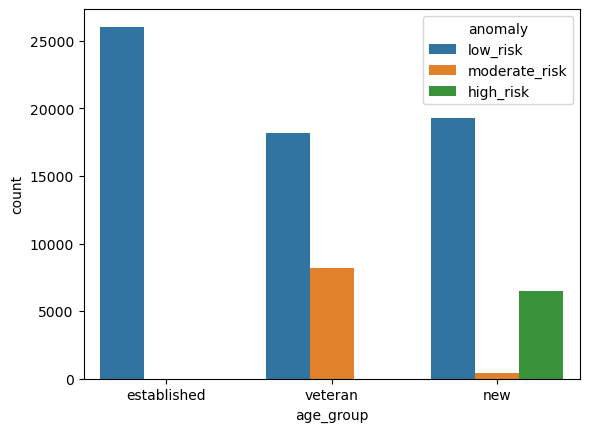

In [16]:
sns.countplot(data=df,x='age_group',hue='anomaly')

Veterans are exposed to moderate risk. This maybe due to the fact that they deal with higher value transactions compared to the other age_groups and therefore are targetted by scammers. However, due to their experience, they are able to avoid a lot of attempts of scamming and phishing.

<Axes: xlabel='age_group', ylabel='count'>

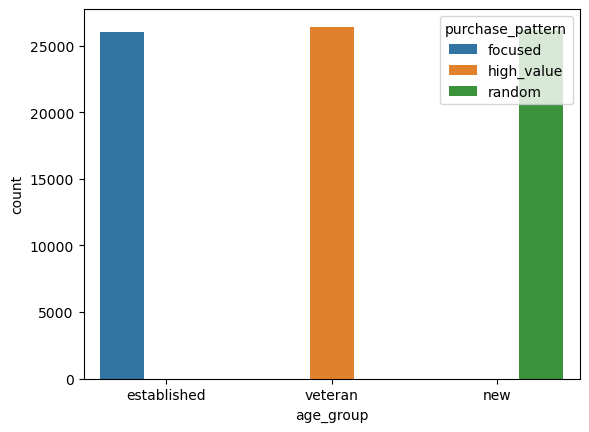

In [17]:
sns.countplot(data=df,x='age_group',hue='purchase_pattern')

As we can see above, both of the theories stated previously regarding the purchase_pattern and age_group seem to be correct.

Veterans have a high_value purchase pattern and new users have a random purchase pattern.

This leaves established users who have have a focused purchase pattern exposed to the lowest risk.

<Axes: xlabel='transaction_type', ylabel='count'>

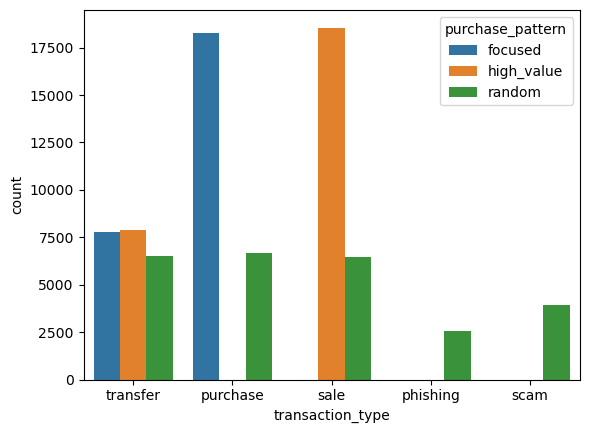

In [18]:
sns.countplot(data=df,x='transaction_type',hue='purchase_pattern')

# EDA On Numerical Columns

In [19]:
df.select_dtypes(exclude='object')

,hour_of_day,amount,ip_prefix,login_frequency,session_duration,risk_score
0,12,796.949206,192.000,3,48,18.7500
1,19,0.010000,172.000,5,61,25.0000
2,16,778.197390,192.168,3,74,31.2500
3,9,300.838358,172.000,8,111,36.7500
4,14,775.569344,172.160,6,100,62.5000
...,...,...,...,...,...,...
78595,12,660.280373,172.000,1,27,26.2500
78596,16,310.273397,172.000,5,60,26.2500
78597,16,624.674332,192.000,1,34,36.7500
78598,4,401.391592,192.168,4,56,35.4375


I am going to create a new column that maps a numerical value for each classification in the anomaly column. This will enable me to see the correlation between the numerical columns and the label.

In [20]:
df['target'] = df['anomaly'].map({'low_risk':0,'moderate_risk':1,'high_risk':2})

In [21]:
df['target'].value_counts()

target
0    63494
1     8611
2     6495
Name: count, dtype: int64

In [22]:
df.corr(numeric_only=True)

,hour_of_day,amount,ip_prefix,login_frequency,session_duration,risk_score,target
hour_of_day,1.000000,0.000484,-0.003166,0.004483,0.006132,-0.190985,-0.113970
amount,0.000484,1.000000,-0.001376,-0.000718,0.000355,0.114075,0.084998
ip_prefix,-0.003166,-0.001376,1.000000,-0.000553,0.000959,0.004278,0.006499
login_frequency,0.004483,-0.000718,-0.000553,1.000000,0.871915,0.033010,-0.112010
session_duration,0.006132,0.000355,0.000959,0.871915,1.000000,0.107844,-0.066161
risk_score,-0.190985,0.114075,0.004278,0.033010,0.107844,1.000000,0.864830
target,-0.113970,0.084998,0.006499,-0.112010,-0.066161,0.864830,1.000000


In [23]:
df.corr(numeric_only=True)['target'].sort_values()

# risk_score has the highest correlation with the target variable so we will create a visualisation to analyse this further.

hour_of_day        -0.113970
login_frequency    -0.112010
session_duration   -0.066161
ip_prefix           0.006499
amount              0.084998
risk_score          0.864830
target              1.000000
Name: target, dtype: float64

<Axes: >

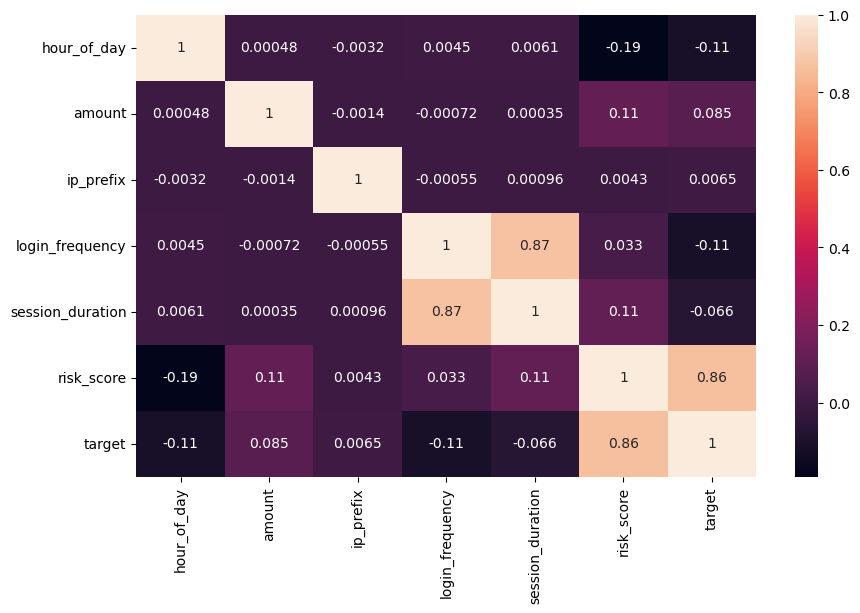

In [24]:
plt.figure(figsize=(10,6),dpi=100)
sns.heatmap(data=df.corr(numeric_only=True),annot=True)

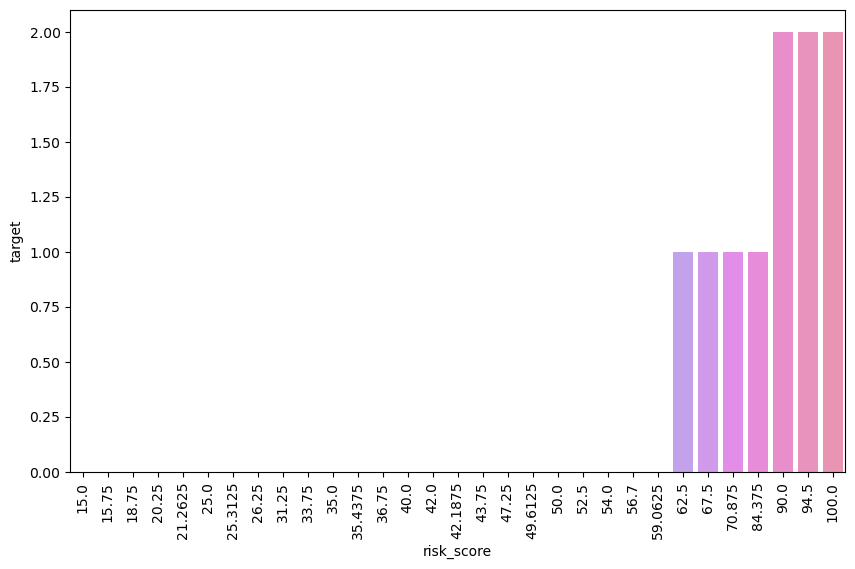

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='risk_score',y='target')
plt.xticks(rotation=90);

<Axes: xlabel='risk_score', ylabel='target'>

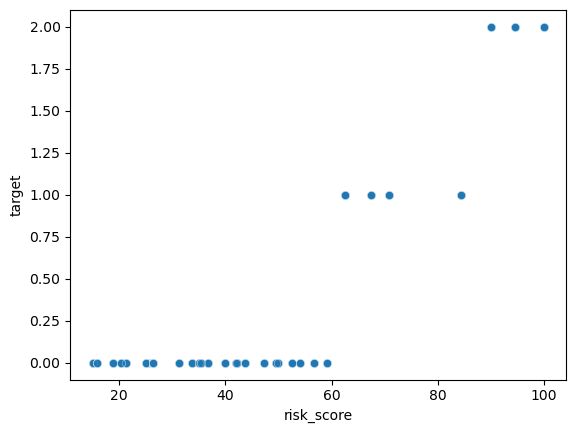

In [26]:
sns.scatterplot(data=df,x='risk_score',y='target',alpha=0.5)

risk_score has a very high correlation with the label and we can also see from the visualisation above that risk_score and anomaly both essentially show the same information.

To avoid target leakage, I will remove the risk_score feature from the dataset for modelling. 

In [27]:
df[['anomaly','hour_of_day']].groupby(['anomaly'],as_index=False).mean()

,anomaly,hour_of_day
0,high_risk,11.641109
1,low_risk,12.134564
2,moderate_risk,7.012426


In [28]:
df[['anomaly','login_frequency']].groupby(['anomaly'],as_index=False).mean()

,anomaly,login_frequency
0,high_risk,1.500693
1,low_risk,4.102844
2,moderate_risk,6.757984


<Axes: xlabel='login_frequency', ylabel='age_group'>

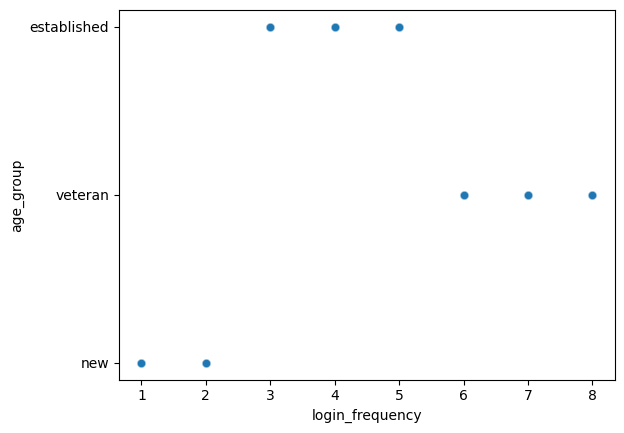

In [29]:
sns.scatterplot(data=df,x='login_frequency',y='age_group',alpha=0.2)

In [30]:
df['session_duration'].value_counts()

session_duration
23     1377
39     1360
28     1359
21     1331
36     1321
       ... 
102     304
155     302
125     298
124     289
129     280
Name: count, Length: 140, dtype: int64

In [31]:
df[['anomaly','session_duration']].groupby(['anomaly'],as_index=False).mean()

,anomaly,session_duration
0,high_risk,29.462510
1,low_risk,67.574133
2,moderate_risk,115.584601


In [32]:
df[['anomaly','amount']].groupby(['anomaly'],as_index=False).mean()

,anomaly,amount
0,high_risk,495.352890
1,low_risk,486.214159
2,moderate_risk,628.659679


<Axes: xlabel='ip_prefix', ylabel='count'>

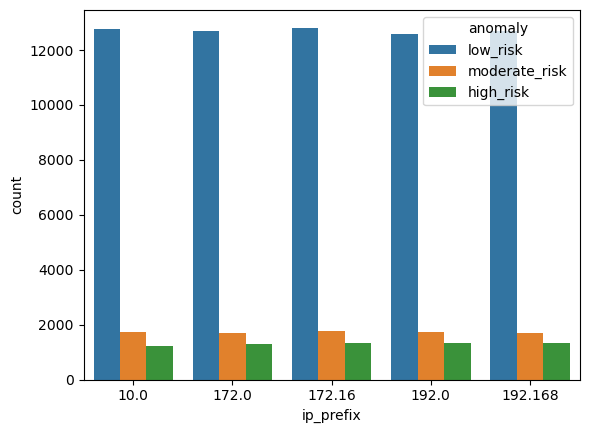

In [33]:
sns.countplot(data=df,x='ip_prefix',hue='anomaly')

In [34]:
df[['transaction_type','amount']].groupby(['transaction_type'],as_index=False).mean()

,transaction_type,amount
0,phishing,494.989280
1,purchase,506.159453
2,sale,502.824245
3,scam,495.587316
4,transfer,500.372180


In [35]:
df[['age_group','amount']].groupby(['age_group'],as_index=False).mean()

,age_group,amount
0,established,502.665637
1,new,502.734231
2,veteran,502.327846


In [92]:
df[['anomaly','amount']].groupby(['anomaly'],as_index=False).mean()

,anomaly,amount
0,high_risk,495.352890
1,low_risk,486.214159
2,moderate_risk,628.659679


The amount per transaction is fairly similar across all age groups, transaction types and anomaly classes which could suggest that the amount feature does not have a huge influence on whether a transaction is fraudulent or not, which is very interesting.

This is also backed up by the fact that the correlation of amount to anomaly is fairly low at 0.084998.

# Feature Engineering and Data Preprocessing

# Handling Outliers

<Axes: >

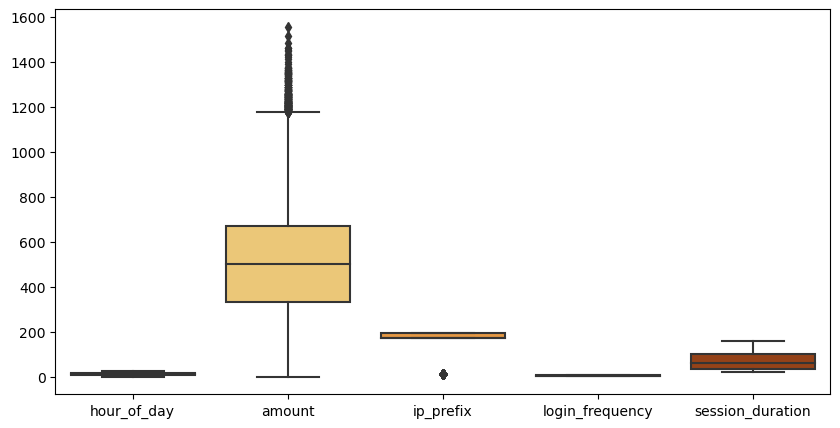

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['hour_of_day','amount','ip_prefix','login_frequency','session_duration']],palette='YlOrBr')

# There doesnt seem to be any outliers, however we will confirm this.

To confirm any outliers I will now define a function that will be used to detect outliers.

I will be using the IQR method whereby the function will calculate the lower and upper limits of each numerical column and any values that fall outside these limits will be classified as an outlier.

The lower limit will be defined as, upper quartile (q25) - (1.5 * Interquartile range)

The upper limit will be defined as, upper quartile (q75) + (1.5 * Interquartile range) 

In [37]:
def identify_outliers(df,features):
    outliers = {}
    for i in features:
        q25,q75 = np.percentile(df[i],[25,75])
        IQR = q75 - q25
        upper_limit = q75 + (1.5*q75)
        lower_limit = q25 - (1.5*q25)
        
        outlier_indexes = df[(df[i] < lower_limit) | (df[i] > upper_limit)].index
        outlier_indexes = list(outlier_indexes)
        outliers.update({i:outlier_indexes})
        
    return outliers

In [38]:
print(identify_outliers(df,['hour_of_day','amount','ip_prefix','login_frequency','session_duration']))

{'hour_of_day': [], 'amount': [], 'ip_prefix': [], 'login_frequency': [], 'session_duration': []}


After running the identify_outliers function, we can see that no outliers have been found as the values in the dictionary above are empty.

Therefore we will not be removing any rows.

We can take the hour_of_day column and turn this into a categorical column where the hours are split into groups for morning, afternoon, evening and night.

I am doing this to the group numbers so that it is easier to gain insight from this feature. 

In [39]:
'''
Morning (6am - 12pm)
afternoon (12pm - 5pm)
evening (5pm-9pm)
night (9pm-6am)

'''

def hours(x):
    if x >= 6 and x < 12:
        return 'Morning'
    elif x >= 12 and x < 17:
        return 'Afternoon'
    elif x >= 17 and x < 21:
        return 'Evening'
    elif x >= 21 and x >= 1 and x < 6:
        return 'Night'

In [40]:
df['time_of_day'] = df['hour_of_day'].apply(hours)

In [41]:
df['time_of_day']

0        Afternoon
1          Evening
2        Afternoon
3          Morning
4        Afternoon
           ...    
78595    Afternoon
78596    Afternoon
78597    Afternoon
78598         None
78599    Afternoon
Name: time_of_day, Length: 78600, dtype: object

In [42]:
X = df.drop(['timestamp','hour_of_day','sending_address','receiving_address','location_region','ip_prefix','target','anomaly','risk_score'],axis=1)
X = pd.get_dummies(data=X)

y = df['anomaly']

I dropped features timestamp, sending_address and receiving_address due to high cardinality.

I also dropped location_region and ip_prefix as during the eda process, I discovered that the each category of both features had an equal number of cases of each classification of anomaly. Therefore not providing any insight that the features affected the class of anomaly. Furthermore, ip_prefix also had a low correlation (0.006499) to the label (anomaly).

hour_of_day was dropped as we transformed this feature into the time_of_day feature. 

target was dropped as we only created this column to look at the correlation and this can only be done with numerical columns.

Finally, anomaly was dropped adn assigned to y as this is the label and what the ML model will be predicting. 

We do not need to preprocess the anomaly column and convert each classification to a numerical value. This is because in scikit-learn, it is perfectly fine to have the label classes as strings.

In [43]:
X.head(10)

,amount,login_frequency,session_duration,transaction_type_phishing,transaction_type_purchase,transaction_type_sale,transaction_type_scam,transaction_type_transfer,purchase_pattern_focused,purchase_pattern_high_value,purchase_pattern_random,age_group_established,age_group_new,age_group_veteran,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning
0,796.949206,3,48,False,False,False,False,True,True,False,False,True,False,False,True,False,False
1,0.010000,5,61,False,True,False,False,False,True,False,False,True,False,False,False,True,False
2,778.197390,3,74,False,True,False,False,False,True,False,False,True,False,False,True,False,False
3,300.838358,8,111,False,False,False,False,True,False,True,False,False,False,True,False,False,True
4,775.569344,6,100,False,False,True,False,False,False,True,False,False,False,True,True,False,False
5,590.253982,4,66,False,False,False,False,True,True,False,False,True,False,False,False,True,False
6,671.496246,8,103,False,False,True,False,False,False,True,False,False,False,True,False,True,False
7,800.208934,1,32,False,False,True,False,False,False,False,True,False,True,False,False,True,False
8,218.030944,4,42,False,False,False,False,True,True,False,False,True,False,False,True,False,False
9,134.595378,3,79,False,False,False,False,True,True,False,False,True,False,False,True,False,False


# Modelling

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [47]:
sample_smote = SMOTE()

X_smote,y_smote = sample_smote.fit_resample(scaled_X_train,y_train)

In [48]:
y_smote.value_counts()

anomaly
low_risk         47471
moderate_risk    47471
high_risk        47471
Name: count, dtype: int64

In [49]:
y.value_counts()

anomaly
low_risk         63494
moderate_risk     8611
high_risk         6495
Name: count, dtype: int64

SMOTE is an oversampling technique which stands for Synthetic Minority Oversampling Technique.

As our dataset is imbalanced I will be utilising this technique to balance the dataset and improve model performance.

As you can see above, SMOTE has balanced the dataset and now all classifications have an equal number of instances.

# Decision Tree Classifier

In [50]:
dtree = DecisionTreeClassifier()

dtree_cv = cross_val_score(estimator=dtree,X=scaled_X_train,y=y_train,cv=5)

dtree_cv.mean()


0.9511959287531807

In [51]:
dtree_smote = DecisionTreeClassifier()

dtree_cv_smote = cross_val_score(estimator=dtree_smote, X=X_smote, y=y_smote, cv=5)

dtree_cv_smote.mean()

0.9739982463616895

# Random Forest Classifier

In [52]:
rfc = RandomForestClassifier()

rfc_cv = cross_val_score(estimator=rfc, X=scaled_X_train, y=y_train, cv=5)

rfc_cv.mean()

0.9553689567430025

In [53]:
rfc_smote = RandomForestClassifier()

rfc_cv_smote = cross_val_score(estimator=rfc_smote,X=X_smote,y=y_smote,cv=5)

rfc_cv_smote.mean()

0.979713938641218

# Gradient Boosting Classifier

In [54]:
gbc = GradientBoostingClassifier()

gbc_cv = cross_val_score(estimator=gbc, X=scaled_X_train, y=y_train, cv=5)

gbc_cv.mean()

0.9655640373197626

In [55]:
gbc_smote = GradientBoostingClassifier()

gbc_cv_smote = cross_val_score(estimator=gbc_smote,X=X_smote,y=y_smote,cv=5)

gbc_cv_smote.mean()

0.9725727163771438

# Ada Boost Classifier

In [56]:
abc = AdaBoostClassifier()

abc_cv = cross_val_score(estimator=abc, X=scaled_X_train, y=y_train, cv=5)

abc_cv.mean()

0.8887022900763359

In [57]:
abc_smote = AdaBoostClassifier()

abc_cv_smote = cross_val_score(estimator=abc_smote,X=X_smote,y=y_smote,cv=5)

abc_cv_smote.mean()

0.9139263754978002

As we can see from the results above, implementing the SMOTE technique to balance the dataset did improve the score for all models.

The Random Forest Classifier model, with oversampling, performed the best so we will use this model for the model prediction. 

In [58]:
final_rfc = RandomForestClassifier()

params = {'n_estimators':[100,200,300],
          'max_depth':[10,20,30],
          'class_weight':['balanced', 'balanced_subsample']
             }

In [59]:
final_rfc_grid = GridSearchCV(estimator=final_rfc,param_grid=params)
final_rfc_grid.fit(X_smote,y_smote)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 300]})

In [60]:
final_rfc_grid.best_params_

{'class_weight': 'balanced_subsample', 'max_depth': 30, 'n_estimators': 100}

In [69]:
final_rfc_grid.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=30)

In [94]:
final_rfc_grid.best_estimator_.feature_importances_

array([0.0889444 , 0.07980414, 0.10577632, 0.04502546, 0.05300888,
       0.16508993, 0.06275499, 0.07785758, 0.02396726, 0.05173674,
       0.05190652, 0.01455019, 0.06431677, 0.06570334, 0.02143711,
       0.02059109, 0.00752927])

In [95]:
important_features = pd.DataFrame(data=final_rfc_grid.best_estimator_.feature_importances_,
                                  index=X.columns,columns=['Feature Importance'])

important_features.sort_values(by='Feature Importance')

,Feature Importance
time_of_day_Morning,0.007529
age_group_established,0.014550
time_of_day_Evening,0.020591
time_of_day_Afternoon,0.021437
purchase_pattern_focused,0.023967
transaction_type_phishing,0.045025
purchase_pattern_high_value,0.051737
purchase_pattern_random,0.051907
transaction_type_purchase,0.053009
transaction_type_scam,0.062755


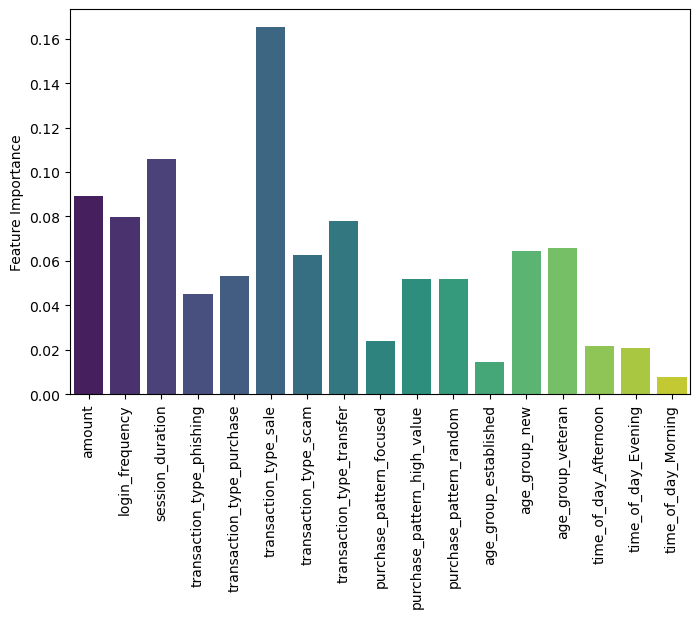

In [96]:
plt.figure(figsize=(8,5),dpi=100)
sns.barplot(data=important_features,x=important_features.index,y='Feature Importance',palette='viridis')
plt.xticks(rotation=90);

In [61]:
y_pred = final_rfc_grid.predict(scaled_X_test)

In [62]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

    high_risk       1.00      1.00      1.00      1577
     low_risk       0.99      0.95      0.97     16023
moderate_risk       0.71      0.91      0.80      2050

     accuracy                           0.95     19650
    macro avg       0.90      0.95      0.92     19650
 weighted avg       0.96      0.95      0.95     19650



The Classification report shows us that the model is able to correctly predict all instances of a high risk transaction.

It does a very good job at predicting low risk with an f1-score of 0.97.

However, the trade off between precision and recall seems to be quite evident when predicting moderate risk. The model doesn't do as well when predicting transactions with moderate risk.

The high recall score for moderate risk means that the model is good at,

predicting moderate risk when true / total instances of moderate risk in the dataset

However, not as well when, 

predicting moderate risk when true / total moderate risk predictions

In [63]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 1577,     0,     0],
       [    0, 15281,   742],
       [    0,   193,  1857]], dtype=int64)

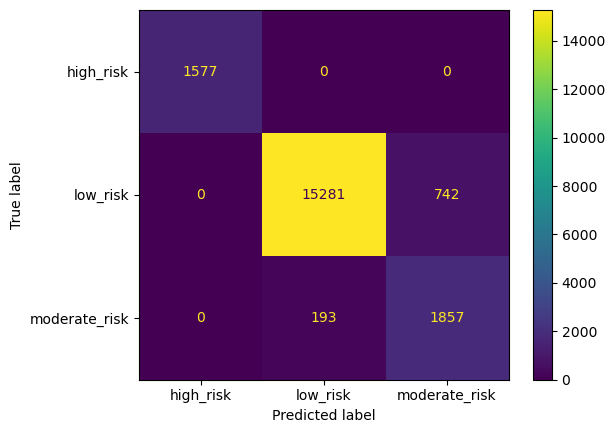

In [77]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=['high_risk','low_risk','moderate_risk'])
cm_display.plot()

Overall, the model has performed well as it is able to predict all transactions with high risk which are more prone to being fraudulent. Therefore we have achieved the business objective!

It also does very well with predicting low risk transactions which means the model will rarely flag a low risk transaction as having moderate risk.

The weakness of the model is that sometimes it can flag a transaction as low risk when it has moderate risk.